In [1]:
from pathlib import Path
import pprint
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import numpy as np
from scipy.stats import linregress
import statsmodels.api as sm
import itertools
import warnings
warnings.filterwarnings('ignore')

In [2]:
col_names=['x1','x2','x3','y1','y2','y3']
df = pd.read_csv('corr.csv', 
                 sep=",", 
                 skiprows=1,
                 names=col_names)

## Pearson and Spearman correlation - Question 1

In [3]:
pearson = df.corr(method='pearson')
print(pearson.iloc[:3,3:])
spearman = df.corr(method='spearman')
print(spearman.iloc[:3,3:])

          y1        y2        y3
x1  0.580098  0.339721  0.339721
x2  0.580098  0.339721  0.339721
x3 -0.197447 -0.901029 -0.901029
          y1        y2        y3
x1  0.572420  0.572420  0.572420
x2  0.572420  0.572420  0.572420
x3  0.431895  0.431895  0.431895


## x1 and y1

<Figure size 432x288 with 0 Axes>

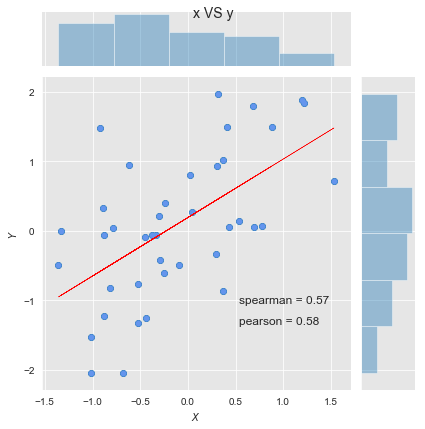

In [4]:
fig1 = plt.figure()
x = df['x1']
y=df['y1']
stats = linregress(x, y)
m = stats.slope
b = stats.intercept
reg_line=m * x + b
equation = 'y1 = '+str(round(m,2)) + ' *' + ' x1 '  + str(round(b,2)) 
pc='pearson = '+ str(round(pearson.iloc[0,3],2))
sc='spearman = '+ str(round(spearman.iloc[0,3],2))

# sns.set_style("darkgrid", {"axes.facecolor": ".9"})
# plt.scatter(x, y,color='cornflowerblue',marker='o')
# plt.plot(x, reg_line, color="red",linewidth='0.5')
# plt.annotate(pc, xy=(min(x),max(y)-0.1), fontsize=12) 
# plt.annotate(sc, xy=(min(x),max(y)-0.4), fontsize=12) 
# plt.title('x VS y')
# plt.xlabel('x')
# plt.ylabel('y')

sns.set_style("darkgrid", {"axes.facecolor": ".9"})
g =sns.jointplot(x='x1', y='y1', data=df);
g.plot_joint(plt.scatter, c='cornflowerblue', s=30, linewidth=0.5)
plt.plot(x, reg_line, color="red",linewidth='0.5')
plt.annotate(pc, xy=(max(x)-1,min(y)+0.7), fontsize=12) 
plt.annotate(sc, xy=(max(x)-1,min(y)+1), fontsize=12) 
g.set_axis_labels("$X$", "$Y$");
g.fig.suptitle('x VS y',fontsize=14)
plt.savefig('x1y1')

## x2 and y2

<Figure size 432x288 with 0 Axes>

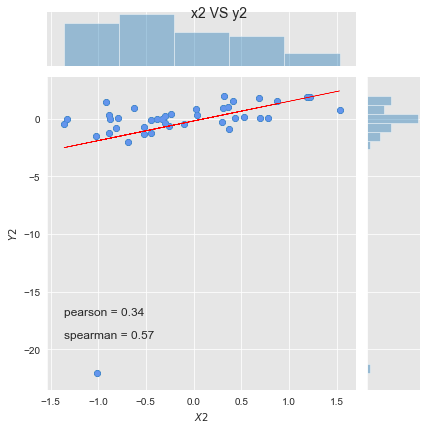

In [5]:
fig2 = plt.figure()
x = df['x2']
y=df['y2']
stats = linregress(x, y)
m = stats.slope
b = stats.intercept
reg_line=m * x + b
equation = 'y2 = '+str(round(m,2)) + ' *' + ' x2 '  + str(round(b,2)) 
pc='pearson = '+ str(round(pearson.iloc[1,4],2))
sc='spearman = '+ str(round(spearman.iloc[1,4],2))

sns.set_style("darkgrid", {"axes.facecolor": ".9"})
g =sns.jointplot(x='x2', y='y2', data=df);
g.plot_joint(plt.scatter, c='cornflowerblue', s=30, linewidth=0.5)
plt.plot(x, reg_line, color="red",linewidth='0.5')
plt.annotate(pc, xy=(min(x),min(y)+5), fontsize=12) 
plt.annotate(sc, xy=(min(x),min(y)+3), fontsize=12) 
g.set_axis_labels("$X2$", "$Y2$");
g.fig.suptitle('x2 VS y2',fontsize=14)

# sns.set_style("darkgrid", {"axes.facecolor": ".9"})
# plt.scatter(x, y,color='cornflowerblue',marker='o')
# plt.plot(x, reg_line, color="red",linewidth='0.5')
# plt.annotate(pc, xy=(min(x),min(y)+5), fontsize=12) 
# plt.annotate(sc, xy=(min(x),min(y)+3), fontsize=12) 
# plt.title('x2 VS y2')
# plt.xlabel('x2')
# plt.ylabel('y2')
plt.savefig('x2y2')

## x3 and y3

<Figure size 432x288 with 0 Axes>

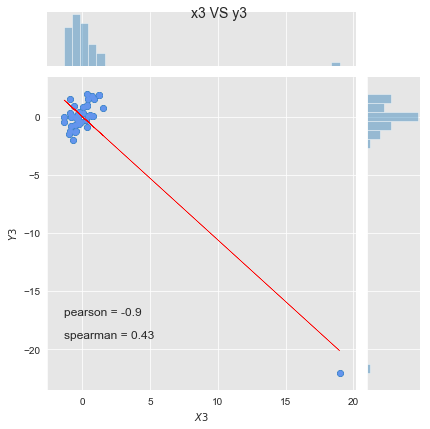

In [6]:
fig3 = plt.figure()
x = df['x3']
y=df['y3']
stats = linregress(x, y)
m = stats.slope
b = stats.intercept
reg_line=m * x + b
equation = 'y3 = '+str(round(m,2)) + ' *' + ' x3 '  + str(round(b,2)) 
pc='pearson = '+ str(round(pearson.iloc[2,5],2))
sc='spearman = '+ str(round(spearman.iloc[2,5],2))

sns.set_style("darkgrid", {"axes.facecolor": ".9"})
g =sns.jointplot(x='x3', y='y3', data=df);
g.plot_joint(plt.scatter, c='cornflowerblue', s=30, linewidth=0.5)

plt.plot(x, reg_line, color="red",linewidth='0.5')
plt.annotate(pc, xy=(min(x),min(y)+5), fontsize=12) 
plt.annotate(sc, xy=(min(x),min(y)+3), fontsize=12) 
g.set_axis_labels("$X3$", "$Y3$");
g.fig.suptitle('x3 VS y3',fontsize=14)

# plt.scatter(x, y,color='cornflowerblue',marker='o')
# plt.title('x3 VS y3')
# plt.xlabel('x3')
# plt.ylabel('y3')
plt.savefig('x3y3')
# sns.jointplot(x='x3', y='y3', data=df);


# Question 2

In [7]:
col_names=['x1','x2','x3','x4','x5','x6','y']
df = pd.read_csv('MLR.csv', 
                 sep=",", 
                 skiprows=1,
#                  usecols=[:],
                 names=col_names)
X=df.iloc[:,:-1]
y=df['y']

In [8]:
## Alternate way to perform mlr
# mlr = smf.ols(formula='y ~ x1 + x2 + x3 + x4 + x5 + x6', data=df).fit()
# mlr.summary()


## Normalize data

In [9]:
data=df
data_norm = (data - data.mean())/data.std()
data_norm.head()

,x1,x2,x3,x4,x5,x6,y
0,1.596349,-0.350869,-1.048438,-1.280976,1.298979,1.571710,1.892374
1,0.684715,1.662877,1.494450,0.121394,-0.237130,-1.076593,-1.055265
2,1.600365,0.090333,-1.417432,0.724822,-0.512417,0.942278,0.824423
3,0.296547,-0.259153,-1.279183,-0.182355,-0.597971,1.778315,1.312983
4,1.185692,-0.428605,0.137137,0.796829,-0.629084,-0.186129,-0.782687


## Visualize normalization

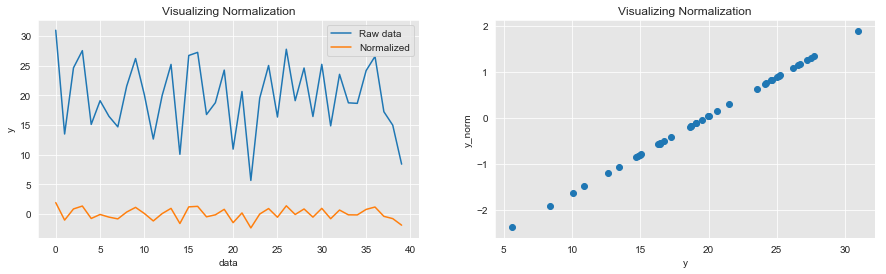

In [10]:
plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
plt.plot(data['y'])
plt.plot(data_norm['y'])
plt.legend(['Raw data','Normalized'])
plt.ylabel('y')
plt.xlabel('data')
plt.title('Visualizing Normalization')

plt.subplot(1,2,2)
plt.scatter(data['y'],data_norm['y'])
plt.ylabel('y_norm')
plt.xlabel('y')
plt.title('Visualizing Normalization')
plt.savefig('normalized data q2')

In [11]:
"""
target variable: y
predictor variables (matrix): X
"""
y = data_norm['y']
X = data_norm.drop('y',axis=1)

In [12]:
lm_MLR = linear_model.LinearRegression()
model = lm_MLR.fit(X,y)
ypred_MLR = lm_MLR.predict(X) #y predicted by MLR
intercept_MLR = lm_MLR.intercept_ #intercept predicted by MLR
coef_MLR = lm_MLR.coef_ #regression coefficients in MLR model
R2_MLR = lm_MLR.score(X,y) #R-squared value from MLR model

coef_MLR

array([ 0.07727992,  0.03667406, -0.35514925, -0.57068481,  0.01919748,
        0.46552718])

## Create dataframe for regression coefficients


In [13]:
df_coeffs = pd.DataFrame() 
schedule= dict = {'Vars':['x1','x2','x3','x4','x5','x6'],
                  'MLR coeffs': coef_MLR} 
  
df_coeffs = pd.DataFrame(dict) 
df_coeffs

,Vars,MLR coeffs
0,x1,0.077280
1,x2,0.036674
2,x3,-0.355149
3,x4,-0.570685
4,x5,0.019197
5,x6,0.465527


Text(0.5,1,'MLR Model Results: R^2 = 0.98')

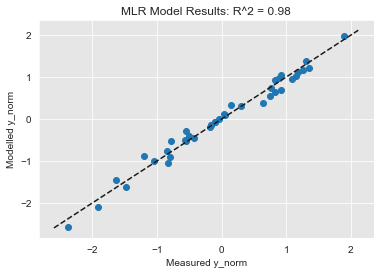

In [14]:
#visualize MLR model performance

ax = plt.subplot(111)
ax.scatter(y,ypred_MLR)
l1 = np.min(ax.get_xlim())
l2 = np.max(ax.get_xlim())
ax.plot([l1,l2], [l1,l2], ls="--", c=".1")
plt.xlabel('Measured y_norm')
plt.ylabel('Modelled y_norm')
plt.title('MLR Model Results: R^2 = ' + str(R2_MLR)[:4])

## Apply stepwise

In [15]:
#NOTE: stepwise_selection function used from: 
#https://datascience.stackexchange.com/questions/24405/how-to-do-stepwise-regression-using-sklearn/24447#24447

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    
    included = list(initial_list)
    good_p_vals=[]
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                good_p_vals.append(best_pval)
#                 print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
#             if verbose:
#                 print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return [included,good_p_vals]

In [16]:
result = stepwise_selection(X, y)
df_coeffs['Included in Step'] = df_coeffs['Vars'].isin(result[0])
print(result[0])
df_coeffs['Step p-vals']=[result[1][3],'na',result[1][2],result[1][1],'na',result[1][0]]
df_coeffs

['x6', 'x4', 'x3', 'x1']


,Vars,MLR coeffs,Included in Step,Step p-vals
0,x1,0.077280,True,0.00532758
1,x2,0.036674,False,na
2,x3,-0.355149,True,7.44399e-07
3,x4,-0.570685,True,3.45675e-17
4,x5,0.019197,False,na
5,x6,0.465527,True,1.01879e-09


In [17]:
#do MLR using predictors chosen from stepwise regression
result=result[0]
lm_step = linear_model.LinearRegression()
model_step = lm_step.fit(X[result],y)
ypred_step = lm_step.predict(X[result]) #y predicted by MLR
intercept_step = lm_step.intercept_ #intercept predicted by MLR
coef_step = lm_step.coef_ #regression coefficients in MLR model
R2_step = lm_step.score(X[result],y) #R-squared value from MLR model
df_coeffs['Step coeffs']=[coef_step[3],'na',coef_step[2],coef_step[1],'na',coef_step[0]]


,Vars,MLR coeffs,Included in Step,Step p-vals,Step coeffs
0,x1,0.077280,True,0.00532758,0.0750933
1,x2,0.036674,False,na,na
2,x3,-0.355149,True,7.44399e-07,-0.334674
3,x4,-0.570685,True,3.45675e-17,-0.570856
4,x5,0.019197,False,na,na
5,x6,0.465527,True,1.01879e-09,0.488096


Text(0.5,1,'Stepwise Model Results: R^2 = 0.97')

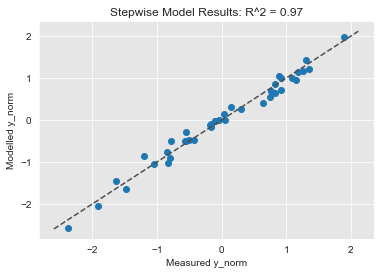

In [18]:
#visualize stepwise model performance

ax = plt.subplot(111)
ax.scatter(y,ypred_step)
l1 = np.min(ax.get_xlim())
l2 = np.max(ax.get_xlim())
ax.plot([l1,l2], [l1,l2], ls="--", c=".3")
plt.xlabel('Measured y_norm')
plt.ylabel('Modelled y_norm')
plt.title('Stepwise Model Results: R^2 = ' + str(R2_step)[:4])

In [19]:
#goal: loop through every combination of normalized predictors, make linear model, and find one with best performance

R2_best = []
combo_best = []

for kk in range(1,7): #for each total number of predictors to use in model (from 1 predictor to 9 predictors)
    
    v0 = range(np.shape(X)[1])
    combinations = list(itertools.combinations(range(np.shape(X)[1]),kk)) #all possible combinations of kk total predictors 
    R2_test = []
    
    for ind in range(len(combinations)): #for each combination of predictors, make MLR model and compute R^2

        test_vars = np.array(combinations[ind])
        X_test = X.iloc[::2,test_vars]
        y_test = y.iloc[::2]
        
        X_valid = X.iloc[1::2,test_vars]
        y_valid = y.iloc[1::2]

        lm_test = linear_model.LinearRegression()
        model_test = lm_test.fit(X_test,y_test)
        ypred_test = lm_test.predict(X_test) #y predicted by MLR
        R2_test.append(lm_test.score(X_valid,y_valid)) #R-squared value from MLR model

    R2_best.append(np.max(R2_test))
    combo_best.append(combinations[np.argmax(R2_test)])
    
R2_best_final = np.max(R2_best)
combo_best_final = combo_best[np.argmax(R2_best)]

print('The best combination of predictors is: ' )
print(list(X.columns[np.asarray(combo_best_final)]))

The best combination of predictors is: 
['x1', 'x3', 'x4', 'x6']


In [20]:
#build linear model using the best combination of predictors

X_calib_valid = X.iloc[:,np.asarray(combo_best_final)]

lm_calib_valid = linear_model.LinearRegression()
model_calib_valid = lm_calib_valid.fit(X_calib_valid,y)
ypred_calib_valid = lm_calib_valid.predict(X_calib_valid) #y predicted by MLR
intercept_calib_valid = lm_calib_valid.intercept_ #intercept predicted by MLR
coef_calib_valid = lm_calib_valid.coef_ #regression coefficients in MLR model
R2_calib_valid = lm_calib_valid.score(X_calib_valid,y) #R-squared value from MLR model
coef_calib_valid

array([ 0.07509328, -0.33467431, -0.57085602,  0.48809648])

Text(0.5,1,'Calibration-Validation Model Results: R^2 = 0.97')

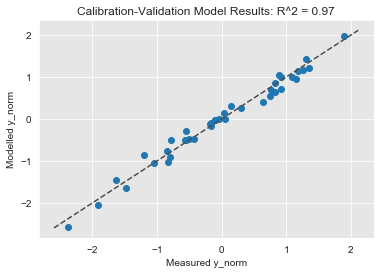

In [21]:
#visualize calibration-validation model performance

ax = plt.subplot(111)
ax.scatter(y,ypred_calib_valid)
l1 = np.min(ax.get_xlim())
l2 = np.max(ax.get_xlim())
ax.plot([l1,l2], [l1,l2], ls="--", c=".3")
plt.xlabel('Measured y_norm')
plt.ylabel('Modelled y_norm')
plt.title('Calibration-Validation Model Results: R^2 = ' + str(R2_calib_valid)[:4])

In [23]:
coeff_out = df_coeffs.drop('Step p-vals',axis=1)

In [24]:
coeff_out

,Vars,MLR coeffs,Included in Step,Step coeffs
0,x1,0.077280,True,0.0750933
1,x2,0.036674,False,na
2,x3,-0.355149,True,-0.334674
3,x4,-0.570685,True,-0.570856
4,x5,0.019197,False,na
5,x6,0.465527,True,0.488096
